# TUGAS PERTAMA PENDAT


Nama : Arif Hidayatullah

Nim  : 210411100012

Kelas: Pendat C

In [1]:
import pandas as pd
import numpy as np
jantung = pd.read_csv('https://raw.githubusercontent.com/ArifHidaya123/pendata/main/healthcare-dataset-stroke-data.csv')
jantung

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [2]:
# Show all columns from dataframe
jantung.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [3]:
jantung[['hypertension', 'stroke']].head(5)

,hypertension,stroke
0,0,1
1,0,1
2,0,1
3,0,1
4,1,1


In [4]:
# CONSTAN VARIABLE
DECREMENT_BY_ONE = 1
INCREMENT_BY_ONE = 1

PROBALITY_TABLE_VALUE = {
    "q" : (1,1),
    "r" : (1,0),
    "s" : (0,1),
    "t" : (0,0),
}

In [5]:
def get_series(jantung, idx, series):
    return jantung.loc[(idx), series]

In [6]:
def dissimilarity_dataset(jantung, series_index = [], series = []):
    first_series = get_series(jantung, series_index[0], series)
    second_series = get_series(jantung, series_index[1], series)
    dataset = pd.concat([first_series,second_series],axis=1)
    return dataset.T

In [7]:
dissimilarity_dataset(jantung, [1,2], ["hypertension", "stroke"]).T

,1,2
hypertension,0,0
stroke,1,1


In [8]:
jantung.loc[0:4, ["hypertension", "stroke"]]

,hypertension,stroke
0,0,1
1,0,1
2,0,1
3,0,1
4,1,1


In [9]:
def count_probality_value(jantung, start_index = 0, last_index = 1):

    PROBALITY_VALUE = {"q" : 0, "r" : 0, "s" : 0, "t" : 0}

    column_range = jantung.shape[1]

    for column in range(column_range):
        for value in PROBALITY_TABLE_VALUE:
            item = list((tuple(jantung.loc[(start_index):(last_index), jantung.columns[column]]) == PROBALITY_TABLE_VALUE[value], value))
            if item[0] == True:
                if item[1] == "q":
                    PROBALITY_VALUE["q"] += 1
                if item[1] == "r":
                    PROBALITY_VALUE["r"] += 1
                if item[1] == "s":
                    PROBALITY_VALUE["s"] += 1
                if item[1] == "t":
                    PROBALITY_VALUE["t"] += 1

    return PROBALITY_VALUE

In [10]:
# dimensi (1,2)
dimensi_1_2 = dissimilarity_dataset(jantung, [1,2], ["hypertension", "stroke"])

In [11]:
probality_d_1_2 = count_probality_value(dimensi_1_2, 1, 2)

In [12]:
# dimensi (1,3)
dimensi_1_3 = dissimilarity_dataset(jantung, [1,3], ["hypertension", "stroke"])

In [13]:
probality_d_1_3 = count_probality_value(dimensi_1_3, 1, 3)

In [14]:
# dimensi (1,4)
dimensi_1_4 = dissimilarity_dataset(jantung, [1,4], ["hypertension", "stroke"])

In [15]:
probality_d_1_4 = count_probality_value(dimensi_1_4, 1, 4)

Dissimilarity Binary Symetric Value Formula


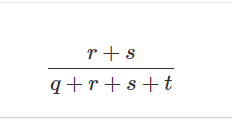

In [16]:
def dissimilarity_binary_symetric_distance(probality_value):
  
    return (probality_value["r"] + probality_value["s"]) / (probality_value["q"] + probality_value["r"] + probality_value["s"] + probality_value["t"])

In [17]:
dimensi_1_2 = dissimilarity_binary_symetric_distance(probality_d_1_2)
dimensi_1_3 = dissimilarity_binary_symetric_distance(probality_d_1_3)
dimensi_1_4 = dissimilarity_binary_symetric_distance(probality_d_1_4)

In [18]:
#d1 dan d2

dimensi_1_2

0.0

In [19]:
# d1 dan d4

dimensi_1_3

0.0

In [20]:
# d1 dan d4

dimensi_1_4

0.5